In [1]:
%matplotlib inline
from matplotlib import gridspec

from miran import *
import re
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'axes.linewidth': 0.2,  'axes.edgecolor': 'gray', 'axes.facecolor':'snow'})
sns.set_palette("Reds_d", 5); my_palette='Reds'; libcolor='Reds'
mpl.rc('font', **{'family':'serif', 'serif':['Times']})
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('axes', labelsize=9)
mpl.rc('text', usetex=True)

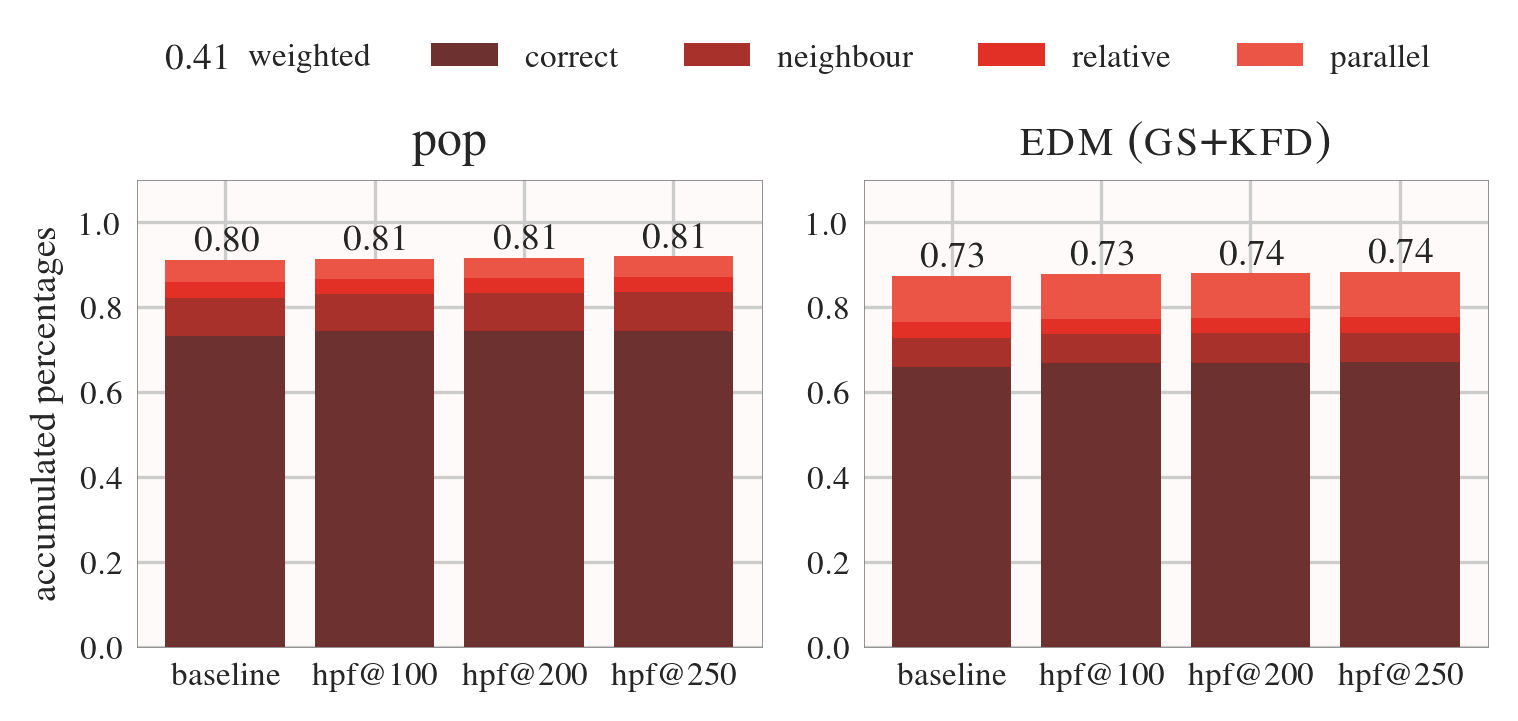

In [2]:
# COMPARISON 1

plt.figure(figsize=(5.16, 2.2), dpi=150)

a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-POP-BASELINE.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-POP-100.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-POP-200.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-POP-250.xlsx'])
cor, nei, rel, par, wei = a

plt.subplot(1,2,1)
plt.title("pop")
plt.ylim([0,1.1])
plt.ylabel('accumulated percentages')
plt.xticks(range(len(a[0])), ('baseline', 'hpf@100', 'hpf@200', 'hpf@250'))

plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)
plt.text(-0.4, 1.36,  '0.41', fontsize=9)    
plt.text(0.15, 1.37,  'weighted', fontsize=8)
plt.legend(fontsize=8, frameon=False, loc=(0.45, 1.2), ncol=4)

a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-EDM-BASELINE.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-EDM-100.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-EDM-200.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-EDM-250.xlsx'])

cor, nei, rel, par, wei = a
plt.subplot(1,2,2)
plt.title(r"\textsc{edm} (\textsc{gs}+\textsc{kfd})")
plt.ylim([0,1.1])
plt.xticks(range(len(a[0])), ('baseline', 'hpf@100', 'hpf@200', 'hpf@250'))
#plt.text(0.0, -0.21, 'temperley', fontsize=10)
#plt.text(2.0,-0.21,  'shaath', fontsize=10)

plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .0))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.tight_layout()
plt.savefig('/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/comparison_1b.pdf', format="pdf", dpi=1200, bbox_inches='tight')

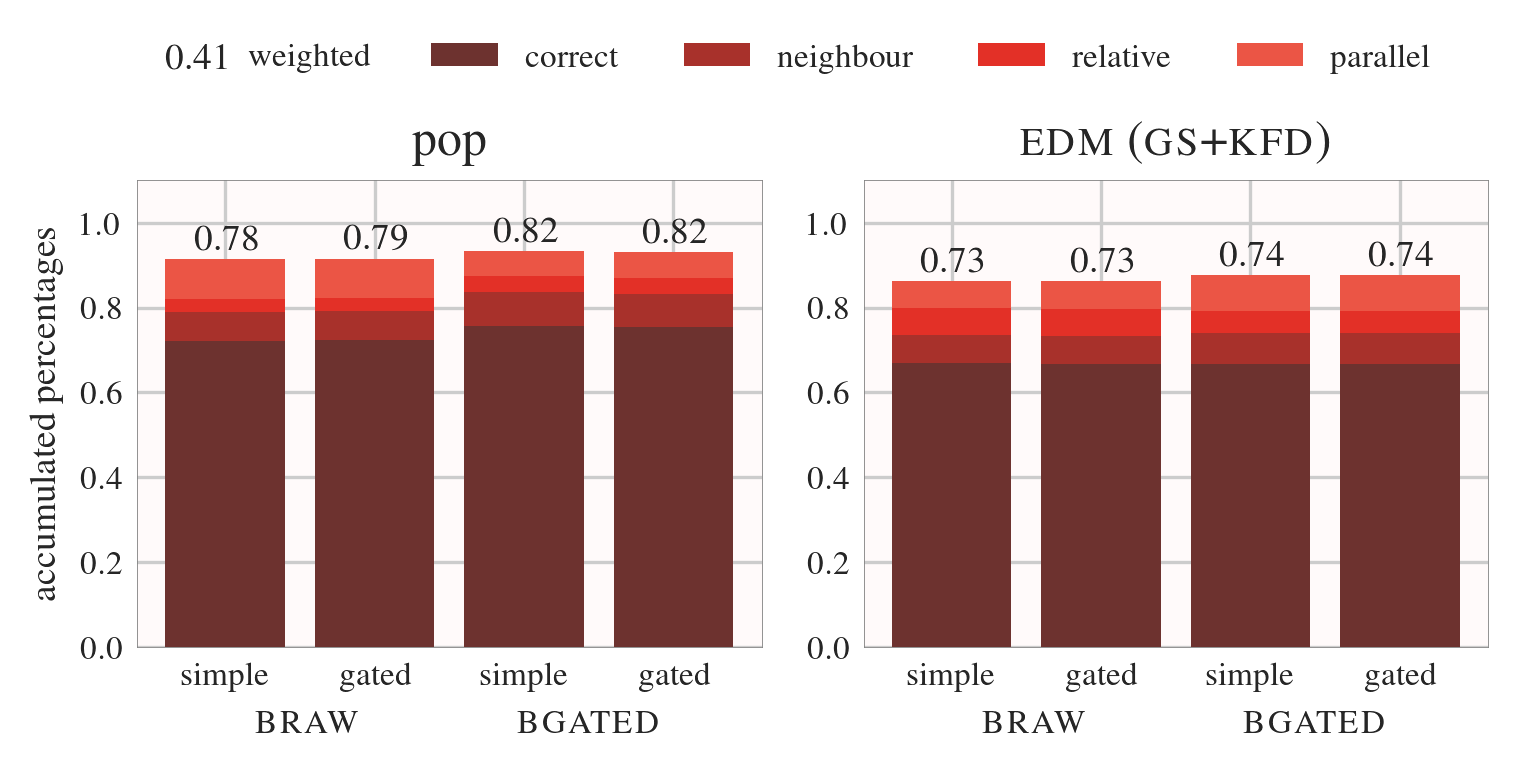

In [3]:
# COMPARISON 2

plt.figure(figsize=(5.16, 2.2), dpi=150)

a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-POP-BRAW.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-POP-BRAW-GATED.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-POP-BGATE.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-POP-BGATE-GATED.xlsx'])

plt.subplot(1,2,1)
cor, nei, rel, par, wei = a
plt.title("pop")
plt.ylim([0,1.1])
plt.ylabel('accumulated percentages')
plt.xticks(range(len(a[0])), ('simple', 'gated','simple', 'gated'))
plt.text(0.2,-0.2,  r'\textsc{braw}', fontsize=10)
plt.text(1.95,-0.2,  r'\textsc{bgated}', fontsize=10)

plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.text(-0.4, 1.36,  '0.41', fontsize=9)    
plt.text(0.15, 1.37,  'weighted', fontsize=8)
plt.legend(fontsize=8, frameon=False, loc=(0.45, 1.2), ncol=4)

a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-EDM-BRAW.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-EDM-BRAW-GATED.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-EDM-BGATE.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-EDM-BGATE-GATED.xlsx'])

cor, nei, rel, par, wei = a

plt.subplot(1,2,2)
plt.title(r"\textsc{edm} (\textsc{gs}+\textsc{kfd})")
plt.ylim([0,1.1])
plt.xticks(range(len(a[0])), ('simple', 'gated','simple', 'gated'))
plt.text(0.2,-0.2,  r'\textsc{braw}', fontsize=10)
plt.text(1.95,-0.2,  r'\textsc{bgated}', fontsize=10)

plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .0))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.tight_layout()
plt.savefig('/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/comparison_2b.pdf', format="pdf", dpi=1200, bbox_inches='tight')

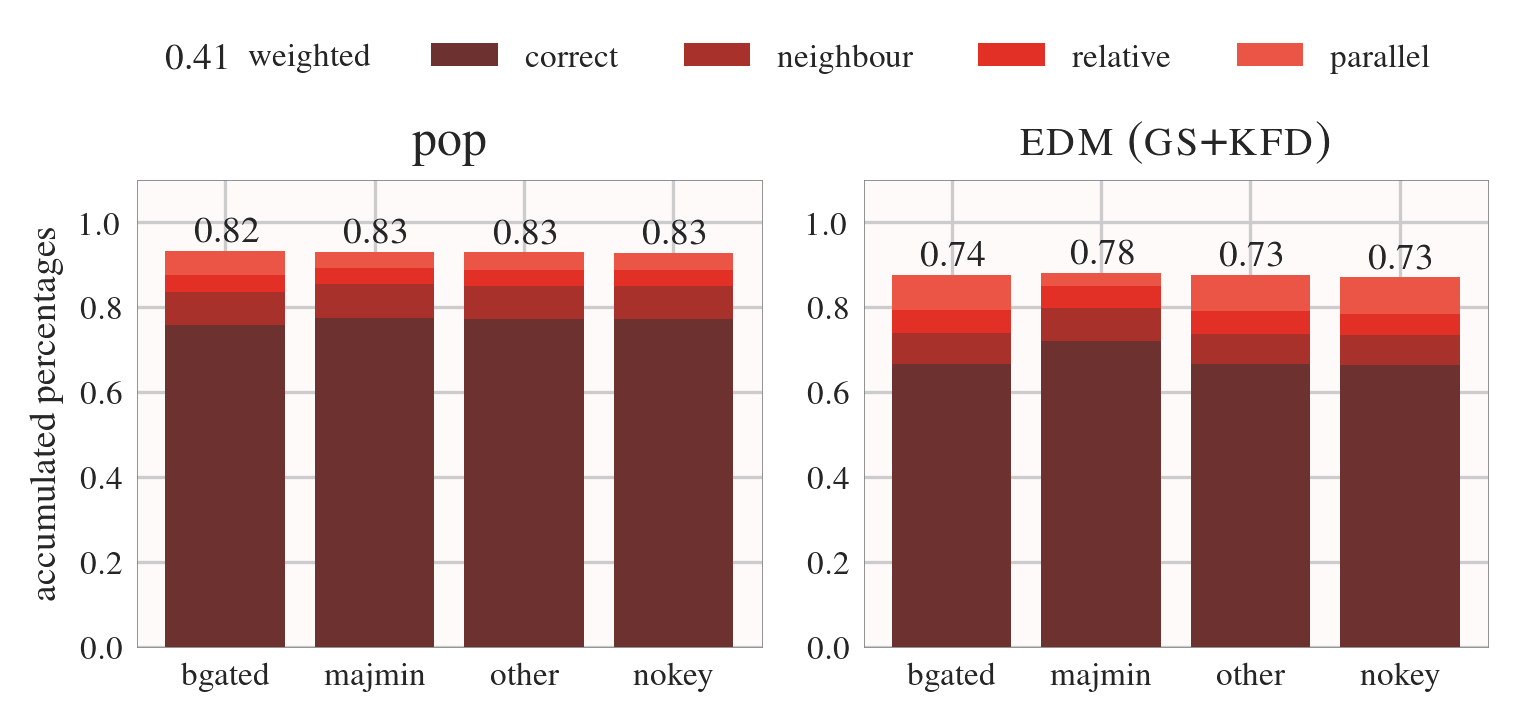

In [4]:
# COMPARISON 3

plt.figure(figsize=(5.16, 2.2), dpi=150)

a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-POP-BGATE.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-POP-MULTI3.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-POP-MULTI4.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-POP-MULTIX.xlsx'])

plt.subplot(1,2,1)
cor, nei, rel, par, wei = a
plt.title("pop")
plt.ylim([0,1.1])
plt.ylabel('accumulated percentages')
plt.xticks(range(len(a[0])), (r'bgated', 'majmin','other', 'nokey'))
#plt.text(0.2,-0.2,  r'\textsc{braw}', fontsize=10)
#plt.text(1.95,-0.2,  r'\textsc{bgated}', fontsize=10)

plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.text(-0.4, 1.36,  '0.41', fontsize=9)    
plt.text(0.15, 1.37,  'weighted', fontsize=8)
plt.legend(fontsize=8, frameon=False, loc=(0.45, 1.2), ncol=4)

a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-EDM-BGATE.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-EDM-MULTI3.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-EDM-MULTI4.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/AES-EDM-MULTIX.xlsx'])

cor, nei, rel, par, wei = a

plt.subplot(1,2,2)
plt.title(r"\textsc{edm} (\textsc{gs}+\textsc{kfd})")
plt.ylim([0,1.1])
plt.xticks(range(len(a[0])), (r'bgated', 'majmin','other', 'nokey'))
# plt.text(0.2,-0.2,  r'\textsc{braw}', fontsize=10)
# plt.text(1.95,-0.2,  r'\textsc{bgated}', fontsize=10)

plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .0))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.tight_layout()
plt.savefig('/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/comparison_3b.pdf', format="pdf", dpi=1200, bbox_inches='tight')